In [1]:
import qucat as qc
import circuitq as cq
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

## QuCat Implementation
See details here: https://qucat.org/tutorials/basics.html#

In [2]:
cir = qc.Network([
qc.C(0,1,100e-15), # transmon
qc.J(0,1,8e-9),
qc.C(0,2,100e-15), # resonator
qc.L(0,2,10e-9),
qc.C(1,2,1e-15)]) # coupling capacitor
# C(2,3,0.5e-15), # ext. coupl. cap.
# R(3,0,50)])

In [3]:
H = cir.hamiltonian(
    modes = [0,1],# Include modes 0 and 1
    taylor = 10,# Taylor the Josephson potential to the power 4
    excitations = [50,50])

In [4]:
evals_qucat = H.eigenenergies()

In [5]:
evals_qucat_scaled = 6.62607015e-34*evals_qucat

## CircuitQ Implementation

In [6]:
graph = nx.MultiGraph()
graph.add_edge(0,1, element = 'C')
graph.add_edge(0,1, element = 'J')
graph.add_edge(0,2, element = 'C')
graph.add_edge(0,2, element = 'L')
graph.add_edge(1,2, element = 'C');

In [7]:
circuit = cq.CircuitQ(graph, ground_nodes=[0])
circuit.h

-E_{J010}*cos(3.03853489761902e+15*\Phi_{1}) + 0.5*q_{1}*(C_{12}*q_{2}/(C_{01}*C_{02} + C_{01}*C_{12} + C_{02}*C_{12}) + q_{1}*(C_{02} + C_{12})/(C_{01}*C_{02} + C_{01}*C_{12} + C_{02}*C_{12})) + 0.5*q_{2}*(C_{12}*q_{1}/(C_{01}*C_{02} + C_{01}*C_{12} + C_{02}*C_{12}) + q_{2}*(C_{01} + C_{12})/(C_{01}*C_{02} + C_{01}*C_{12} + C_{02}*C_{12})) + \Phi_{2}**2/(2*L_{020})

In [8]:
circuit.h_parameters

[C_{01}, C_{02}, C_{12}, E_{J010}, L_{020}]

In [9]:
h_num = circuit.get_numerical_hamiltonian(100,  grid_length=np.pi*circuit.phi_0,
            parameter_values=[100e-15,100e-15, 1e-15, (circuit.phi_0**2)/8e-9, 10e-9])

In [10]:
evals, estates = circuit.get_eigensystem()

## Compare

/Users/philipp/miniconda3/lib/python3.6/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


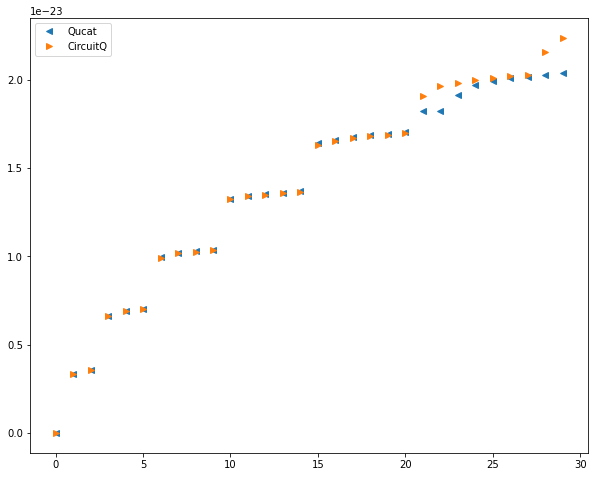

In [14]:
cutoff = 30
plt.figure(figsize=(10,8))
plt.plot(evals_qucat_scaled[:cutoff]-np.min(evals_qucat_scaled[:cutoff]), '<', label="Qucat")
plt.plot(evals[:cutoff]-np.min(evals[:cutoff]),'>' , label="CircuitQ")
plt.legend()
plt.show()